# GroupLens Research Project 

DESCRIPTION
Background of Problem Statement :
The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.
Problem Objective :
Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.
Domain: Entertainment
Analysis Tasks to be performed:
•	Import the three datasets
•	Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
•	Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
1.	User Age Distribution
2.	User rating of the movie “Toy Story”
3.	Top 25 movies by viewership rating
4.	Find the ratings for all the movies reviewed by for a particular user of user id = 2696
•	Feature Engineering:
            Use column genres:
1.	Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
2.	Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
3.	Determine the features affecting the ratings of any particular movie.
4.	Develop an appropriate model to predict the movie ratings
Dataset Description :
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.
Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp
Field	Description
UserID	Unique identification for each user
MovieID	Unique identification for each movie
Rating	User rating for each movie
Timestamp	Timestamp generated while adding user review
•	UserIDs range between 1 and 6040 
•	The MovieIDs range between 1 and 3952
•	Ratings are made on a 5-star scale (whole-star ratings only)
•	A timestamp is represented in seconds since the epoch is returned by time(2)
•	Each user has at least 20 ratings
 
Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code
Field	Description
UserID	Unique identification for each user
Genere	Category of each movie
Age	User’s age
Occupation	User’s Occupation
Zip-code	Zip Code for the user’s location
All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.
•	Gender is denoted by an "M" for male and "F" for female
•	Age is chosen from the following ranges:
 
Value	Description
1	"Under 18"
18	"18-24"
25	"25-34"
35	"35-44"
45	"45-49"
50	"50-55"
56	"56+"
 
•	Occupation is chosen from the following choices:
Value
 	Description
0	"other" or not specified
1	"academic/educator"
2	"artist”
3	"clerical/admin"
4	"college/grad student"
5	"customer service"
6	"doctor/health care"
7	"executive/managerial"
8	"farmer"
9	"homemaker"
10	"K-12 student"
11	"lawyer"
12	"programmer"
13	"retired"
14	 "sales/marketing"
15	"scientist"
16	 "self-employed"
17	"technician/engineer"
18	"tradesman/craftsman"
19	"unemployed"
20	"writer”

Movies.dat
Format - MovieID::Title::Genres
Field	Description
MovieID	Unique identification for each movie
Title	A title for each movie
Genres	Category of each movie
 
•	 Titles are identical to titles provided by the IMDB (including year of release)
 
•	Genres are pipe-separated and are selected from the following genres:
1.	Action
2.	Adventure
3.	Animation
4.	Children's
5.	Comedy
6.	Crime
7.	Documentary
8.	Drama
9.	Fantasy
10.	Film-Noir
11.	Horror
12.	Musical
13.	Mystery
14.	Romance
15.	Sci-Fi
16.	Thriller
17.	War
18.	Western
•	Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
•	Movies are mostly entered by hand, so errors and inconsistencies may exist
 



In [1]:
#importing required libaraies-------------
import pandas as pd 

In [2]:
#import dataset-----------------
movies=pd.read_csv('movies.dat',sep='::',header=None,names=['MovieID','Title','Genres'])
movies

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [3]:
ratings=pd.read_csv('ratings.dat',sep='::',header=None,names=['UserID','MovieID','Rating','Timestamp'])
ratings

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [4]:
users=pd.read_csv('users.dat',sep='::',header=None,names=['UserID','Gender','Age','Occupation','Zip-code'])
users

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [5]:
#Merge the ratings and users with movieID and UserID
ratings_user = pd.merge(ratings,users, on=['UserID'])
ratings_movie = pd.merge(ratings,movies, on=['MovieID'])

master_data = pd.merge(ratings_user,ratings_movie,
                       on=['UserID', 'MovieID', 'Rating'])[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

master_data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


<function matplotlib.pyplot.show(close=None, block=None)>

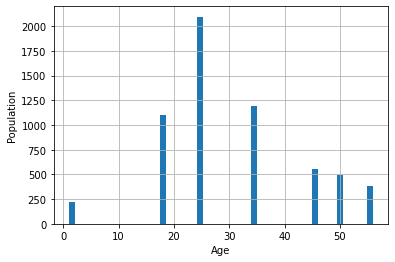

In [6]:
#User age distribution
import matplotlib.pyplot as plt

users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

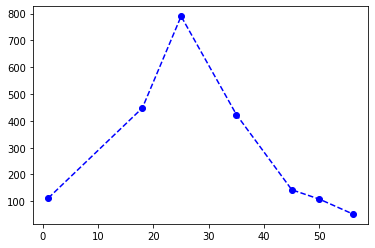

In [7]:
#User rating of the movie “Toy Story”

res = master_data[master_data.Title == "Toy Story (1995)"]

plt.plot(res.groupby("Age")["MovieID"].count(),'--bo')
res.groupby("Age")["MovieID"].count()

<AxesSubplot:xlabel='Viewership Count', ylabel='Title'>

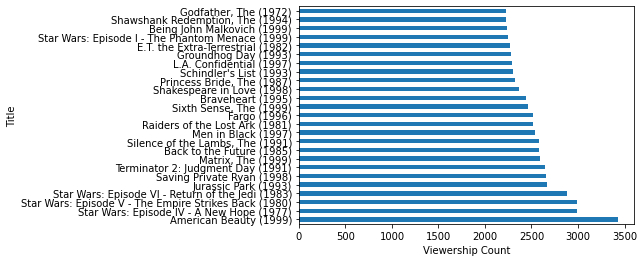

In [8]:
#Top 25 movies by viewership rating

res = master_data.groupby("Title").size().sort_values(ascending=False)[:25]
plt.ylabel("Title")
plt.xlabel("Viewership Count")
res.plot(kind="barh")
#res

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
440667,1258,"Shining, The (1980)",2696,25,M,7,4
440668,1270,Back to the Future (1985),2696,25,M,7,2
440669,1617,L.A. Confidential (1997),2696,25,M,7,4
440670,1625,"Game, The (1997)",2696,25,M,7,4
440671,1644,I Know What You Did Last Summer (1997),2696,25,M,7,2
440672,1645,"Devil's Advocate, The (1997)",2696,25,M,7,4
440673,1805,Wild Things (1998),2696,25,M,7,4
440674,1892,"Perfect Murder, A (1998)",2696,25,M,7,4
440675,800,Lone Star (1996),2696,25,M,7,5
440676,2338,I Still Know What You Did Last Summer (1998),2696,25,M,7,2


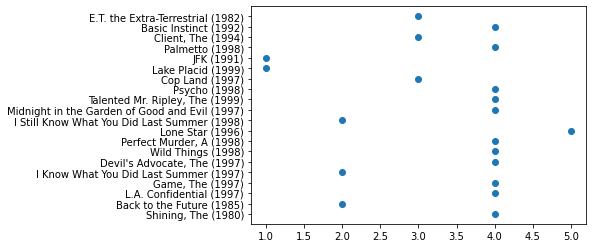

In [9]:
#Finding the ratings for all the movies reviewed by for a particular user of user id = 2696

res = master_data[master_data.UserID == 2696]

plt.scatter(y=res.Title, x=res.Rating)

res

In [10]:
#Feature Engineering

val = movies.Genres.str.split("|")

res_col = []
for v in val:
    for i in v:
        if i not in res_col:
            res_col.append(i)

res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")

df = pd.DataFrame(columns=res_col)

res = master_data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

for index, row in res.head(20000).iterrows():
    tmp = row.Genres.split("|") 
    
    for i in tmp:
       # print(i)
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
         
#         var = res.loc[index, "Rating"]
#         if var == 1:
#             df.loc[index,"Rating"] = "one" 
#         elif var == 2:
#             df.loc[index,"Rating"] = "two"
#         elif var == 3:
#             df.loc[index,"Rating"] = "three"
#         elif var == 4:
#             df.loc[index,"Rating"] = "four"
#         else:
#             df.loc[index,"Rating"] = "five"
     
    df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

df.head()
    

#df.loc[i,"Animation"] = 1

#df

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,F,1,5


Features affecting the ratings of any particular movie.

In [13]:
df.dtypes

Animation      object
Children's     object
Comedy         object
Adventure      object
Fantasy        object
Romance        object
Drama          object
Action         object
Crime          object
Thriller       object
Horror         object
Sci-Fi         object
Documentary    object
War            object
Musical        object
Mystery        object
Film-Noir      object
Western        object
Gender         object
Age            object
Rating         object
dtype: object

In [23]:
from sklearn import datasets 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

X = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating

# dividing X, y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0) 

number = LabelEncoder()
X_train.Gender = number.fit_transform(X_train["Gender"].astype("str"))
X_test.Gender = number.fit_transform(X_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

/usr/local/lib/python3.7/site-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3116